# Importación de librerías

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import re # Expresiones regulares
from sklearn import preprocessing # LabelEncoder

In [2]:
data = pd.read_table("../Dataset/labeledEligibilitySample10k.csv", header = None)

In [3]:
print(data.shape)

(10000, 1)


### Se transforma la variable elegible (la salida) en 0 y 1

In [4]:
clin_trial = pd.DataFrame(np.array(data).reshape(10000,1), columns=['Description'])
clin_trial[:].head(10)

,Description
0,"18518,__label__0,study interventions are Erlot..."
1,"71331,__label__0,study interventions are Antib..."
2,"232342,__label__0,study interventions are Cycl..."
3,"450677,__label__0,study interventions are Pred..."
4,"410008,__label__0,study interventions are Inte..."
5,"307723,__label__0,study interventions are Erlo..."
6,"378773,__label__0,study interventions are Phar..."
7,"479580,__label__0,study interventions are Myco..."
8,"458795,__label__0,study interventions are gamm..."
9,"366518,__label__0,study interventions are Succ..."


In [5]:
clin_trial['Num'], clin_trial['ExtraPart'] = clin_trial['Description'].str.split(',', 1).str
clin_trial=clin_trial.drop(['Num'], axis=1)

clin_trial['Label'], clin_trial['TrashPart'] = clin_trial['ExtraPart'].str.split(',', 1).str
clin_trial['Eligible'] = clin_trial['Label'].str.extract('(\d)', expand=True)
clin_trial=clin_trial.drop(['Label'], axis=1)
clin_trial=clin_trial.drop(['ExtraPart'], axis=1)

clin_trial['Interventions'], clin_trial['Diagnoses'] = clin_trial['TrashPart'].str.split('.', 1).str
clin_trial=clin_trial.drop(['TrashPart'], axis=1)

clin_trial=clin_trial.drop(['Description'], axis=1)

clin_trial.head(10)

,Eligible,Interventions,Diagnoses
0,0,study interventions are Erlotinib Hydrochloride,recurrent midline lethal granuloma of the par...
1,0,study interventions are Antibodies,fallopian tube cancer diagnosis and periphera...
2,0,study interventions are Cyclosporine,recurrent adult diffuse mixed cell lymphoma d...
3,0,study interventions are Prednisolone phosphate,childhood immunoblastic large cell lymphoma d...
4,0,study interventions are Interferon-alpha,stage multiple myeloma diagnosis and serum pr...
5,0,study interventions are Erlotinib Hydrochloride,patients must have carcinoma of unknown prima...
6,0,study interventions are Pharmacological Study,hepatoblastoma diagnosis and two weeks must h...
7,0,study interventions are Mycophenolic Acid,recurrent grade one follicular lymphoma diagn...
8,0,study interventions are gamma-secretase/Notch ...,recurrent non small cell lung cancer diagnosi...
9,0,study interventions are Succinylcholine,untreated childhood medulloblastoma diagnosis...


In [6]:
# Se quita study interventions are puesto que está en todas las muestras de la varialbe Interventions
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace("study interventions are\s", "")
clin_trial.sample(10)

,Eligible,Interventions,Diagnoses
6,0,Pharmacological Study,hepatoblastoma diagnosis and two weeks must h...
7794,1,Everolimus,hormone receptor positive malignant neoplasm ...
157,0,Bevacizumab,colorectal cancer diagnosis and at least twen...
3201,0,Cyclosporins,patients must have evidence of persistent lym...
4936,0,Cisplatin,nasopharyngeal carcinoma diagnosis and liver ...
4639,0,Cyclophosphamide,recurrent diffuse large cell lymphoma diagnos...
3812,0,Liposomal doxorubicin,multiple myleoma diagnosis and however if ref...
8654,1,Pegaspargase,mature cell and nk cell non hodgkin lymphoma ...
7491,1,pomegranate liquid extract,prostate cancer diagnosis and subjects unable...
6891,1,Doxorubicin,advanced adult primary liver cancer diagnosis...


In [7]:
#Sirve para buscar palabras con esos caracteres

# for name in list(clin_trial.columns):
#     for sample in clin_trial[name]:
#         if re.findall('[+=*^#áÁéÉíÍóÓúÚ\[\]\$,.;:!@¡¿?\{\}\&`~\^\(\)|%_\-<>\'\"]', sample):
#             print(sample, "\n") ## Funciona para detectar caracteres especiales

In [8]:
# Se transforma todo a minúsculas
clin_trial['Interventions'] = clin_trial['Interventions'].str.lower() ##Todo a minúscula
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.lower()     ##Todo a minúscula

#Se reemplazan vocales con tildes en ambas variables
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[áäâà]', 'a', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[éêèë]', 'e', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[íïìî]', 'i', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[óôòö]', 'o', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[úûùü]', 'u', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('["]', '', regex=True)

clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[áäâà]', 'a', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[éêèë]', 'e', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[íïìî]', 'i', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[óôòö]', 'o', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[úûùü]', 'u', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('^\s', '', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('["]', '', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[;]', '', regex=True)



#clin_trial.sample(10)

In [9]:
# Total de categorías diferentes en la variable Interventions
len(np.unique(clin_trial['Interventions'])) 

1426

In [10]:
# Sirve para ver cuantos datos hay por categoría de interventions

datosInt = clin_trial['Interventions'].value_counts()

In [11]:
# Total de categorías diferentes en la variable Diagnoses
len(np.unique(clin_trial['Diagnoses']))

9786

In [12]:
datosDiag = clin_trial['Diagnoses'].value_counts() 
#datosDiag

## Codificación de la variable Interventions

In [13]:
labels = np.unique(clin_trial['Interventions'])

lb_interventions = preprocessing.LabelEncoder()
lb_interventions.fit(labels)
clin_trial['Interventions'] = lb_interventions.transform(clin_trial['Interventions']) 

In [14]:
clin_trial

,Eligible,Interventions,Diagnoses
0,0,464,recurrent midline lethal granuloma of the para...
1,0,101,fallopian tube cancer diagnosis and peripheral...
2,0,349,recurrent adult diffuse mixed cell lymphoma di...
3,0,1052,childhood immunoblastic large cell lymphoma di...
4,0,708,stage multiple myeloma diagnosis and serum pro...
...,...,...,...
9995,1,1109,prostate neoplasms diagnosis and if brain imag...
9996,1,200,multiple myeloma diagnosis and any condition i...
9997,1,1201,lung carcinoid tumor diagnosis and patients wh...
9998,1,939,stage iv colorectal cancer diagnosis and serio...


# Remover Stop Words

## Preliminares

In [15]:
# Se carga la libreria
from nltk.corpus import stopwords

# Se debe descargar el conjunto de 'Stop Words' la primera vez
import nltk
nltk.download('stopwords')

#Se carga la librería de lematización
#PONER conda install -c conda-forge spacy EN ANACONDA PROMPT
# Y python -m spacy download en_core_web_sm

#Se carga la librería de lematización
import spacy
nlp = spacy.load("en_core_web_sm")

#Se carga la librería de stemming y se inicializa el stemmer
import nltk
from nltk import SnowballStemmer
stemmer=SnowballStemmer('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Crear las palabras Token

## Lematización

"Dada una forma flexionada (es decir, en plural, en femenino, conjugada, etc), hallar el lema correspondiente. El lema es la forma que por convenio se acepta como representante de todas las formas flexionadas de una misma palabra. Es decir, el lema de una palabra es la palabra que nos encontraríamos como entrada en un diccionario tradicional: singular para sustantivos, masculino singular para adjetivos, infinitivo para verbos." -Wikipedia

In [16]:
#https://medium.com/qu4nt/reducir-el-número-de-palabras-de-un-texto-lematización-y-radicalización-stemming-con-python-965bfd0c69fa
toks = []

for sample in clin_trial['Diagnoses']:
    words = nlp(sample)
    lemma = [tok.lemma_.lower() for tok in words]
    #print(lemma)
    toks.append(lemma)
    

## Cargar las Stop Words

In [17]:
# Carga las Stop Words en inglés
stop_words = stopwords.words('english')

## Estaría bien revisar este conjunto 'english'. Pero supongo que es el más útil para nuestro caso también.
# Imprime algunas Stop Words
#stop_words[:100]

## Remover las Stop Words

In [18]:
tokens = []
for tok in toks:
    clean_word = [word for word in tok if word not in stop_words]
    tokens.append(clean_word)

## Stemming

"Es un método para reducir una palabra a su raíz o (en inglés) a un stem." - Wikipedia

In [19]:
stemms = []
for tok in tokens:
    var = [stemmer.stem(token) for token in tok]
    stemms.append(var)

# TF-IDF 
Term frequency – Inverse document frequency

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
stemmsT = [ ' '.join(stemms[item]) for item in range (len(stemms))] #Se transforma de lista de listas a una lista

In [22]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(stemmsT)

In [23]:
cols = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()

In [24]:
df = pd.DataFrame(data=denselist, columns= cols)

In [25]:
df

,14v,1five,1four,1six,1three,1two,1two0,1two00,1two5,1zero,...,³one0,³one00,µl,ºc,½_teaspoon,μl,μmol,ⅰa,ⅱa,ⅲa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Ordenar y eliminar palabras

In [24]:
import operator

bowDict = {}

for column in df:
    bowDict[column] = df[column].sum()

bowDict_sort = sorted(bowDict.items(), key=operator.itemgetter(1), reverse=True)

# print(bowDict_sort)

In [25]:
bowDict_sort2 = bowDict_sort
for word in bowDict_sort2:
    if word[1]>3400: #Para eliminar con un umbral
        bowDict_sort2.remove(word) 

# Concatenación de dfs

In [26]:
del clin_trial['Diagnoses']
clin_trial_full = pd.concat([clin_trial, df], axis=1)
clin_trial_full

,Eligible,Interventions,14v,1five,1four,1six,1three,1two,1two0,1two00,...,³one0,³one00,µl,ºc,½_teaspoon,μl,μmol,ⅰa,ⅱa,ⅲa
0,0,464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,1,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,1,1201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,1,939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Guardado del modelo

In [27]:
clin_trial_full.to_hdf('bagOfWords10k_TFIDF.h5', key = 'clin_trial')

In [28]:
df_loaded = pd.read_hdf('bagOfWords10k_TFIDF.h5', 'clin_trial')

In [29]:
df_loaded

,Eligible,Interventions,14v,1five,1four,1six,1three,1two,1two0,1two00,...,³one0,³one00,µl,ºc,½_teaspoon,μl,μmol,ⅰa,ⅱa,ⅲa
0,0,464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,1,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,1,1201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,1,939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Algoritmos de clasificación

In [30]:
clin_trial_values = clin_trial_full.values
Y = clin_trial_values[:, 0]
Y = Y.astype(int)
X = clin_trial_values[:, 1:]

In [31]:
def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)

# Naive Bayes

In [32]:
from sklearn.preprocessing import MinMaxScaler # Escala los datos
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import scikitplot as skplt 
from string import ascii_uppercase 
# import seaborn as sns
import qgrid
import time
from sklearn.externals import joblib # Para guardar el modelo

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
def model_NB(impresion = False):

    tiempo_i = time.time()

    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,2])
    recall_list = np.zeros([4,2])
    f_list = np.zeros([4,2]) 
    errores = np.zeros(4)
    nb = GaussianNB()
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)

        nb.fit(Xtrain, Ytrain)
        pred = nb.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_
                
        errores[j] = classification_error(pred, Ytest)
          
    if impresion == True:
        j = 0
        skplt.metrics.plot_confusion_matrix(Ytest, pred, normalize=True)

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)

Eficiencia 0.6462  Int_Eficiencia 0.018186808406094816  Sensibilidad 0.6466100557089924  Int_Sensibilidad 0.2181223214664774  Precision 0.6800730645962471  Int_Precision 0.08135385238712006  F-Score 0.6287275276146842  Int_F-Score 0.08373197557296509  Error_Prueba 0.3538  Int_Error 0.018186808406094792  Tiempo ejecución 57.493298292160034


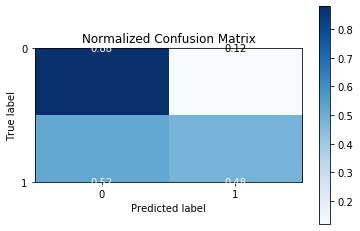

In [35]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_NB(impresion = True)
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

In [ ]:
# joblib.dump(nb, 'naive_bayes.pkl') # Guardo el modelo.

# Logistic Regression

In [36]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression

In [47]:
def LRC(c, slv, impresion = False):

    tiempo_i = time.time()
    
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,2])
    recall_list = np.zeros([4,2])
    f_list = np.zeros([4,2]) 
    errores = np.zeros(4)
    LR = LogisticRegression(C=c, solver=slv, max_iter = 200)
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        
        LR.fit(Xtrain, Ytrain)
        pred = LR.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_

                
        errores[j] = classification_error(pred, Ytest)
           
    if impresion == True:
        skplt.metrics.plot_confusion_matrix(Ytest, pred, normalize=True)

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)

Eficiencia 0.7986  Int_Eficiencia 0.004720169488482375  Sensibilidad 0.7986768022128583  Int_Sensibilidad 0.009535143358048094  Precision 0.7986395633663916  Int_Precision 0.010710277825008444  F-Score 0.7985656116874214  Int_F-Score 0.005391893072253638  Error_Prueba 0.20140000000000002  Int_Error 0.0047201694884823845  Tiempo ejecución 51.736053705215454


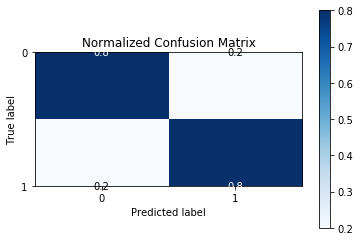

In [48]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = LRC(1, 'liblinear', impresion = True)
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

In [49]:
pd.options.mode.chained_assignment = None

randn = np.random.randn
df_types = pd.DataFrame({
    'Tipo de solver' : pd.Series(['newton-cg', 'newton-cg', 'newton-cg', 'newton-cg', 'newton-cg', 'newton-cg', 
                          'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 
                          'liblinear', 'liblinear', 'liblinear','liblinear','liblinear','liblinear',
                          'sag','sag','sag','sag','sag','sag',
                          'saga','saga','saga','saga','saga','saga']),
    'Valor de regularización' : pd.Series([0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""
df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Tipo de solver', 'Valor de regularización'], inplace=True)

i = 0
for k, n in df_types.index:
    Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = LRC(n, k, impresion = False)
    df_types["Eficiencia"][i] = Acc
    df_types["Int_Eficiencia"][i] = IntAcc
    df_types["Sensibilidad"][i] = Sen
    df_types["Int_Sensibilidad"][i] = IntSen
    df_types["Precision"][i] = Pre
    df_types["Int_Precision"][i] = IntPre
    df_types["F-Score"][i] = f
    df_types["Int_F-Score"][i] = IntF
    df_types["Error_Prueba"][i] = error
    df_types["Int_error"][i] = stdError
    df_types["Tiempo de ejecución"][i] = tiempo
    
    i += 1
    
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [50]:
qgrid_widget.get_changed_df()

Eficiencia  \
Tipo de solver Valor de regularización                       
newton-cg      0.01                                 0.7563   
               0.10                     0.7897000000000001   
               0.50                                 0.7985   
               1.00                                  0.804   
               1.50                                 0.8047   
               2.00                                 0.7987   
lbfgs          0.01                                 0.7657   
               0.10                                 0.7963   
               0.50                     0.7996000000000001   
               1.00                     0.8075000000000001   
               1.50                     0.7987000000000001   
               2.00                     0.7935000000000001   
liblinear      0.01                     0.7586999999999999   
               0.10                                  0.795   
               0.50                                 0.8041   
               1.00                                 0.8014   
               1.50                                 0.7984   
               2.00                                 0.8022   
sag            0.01                                 0.7638   
               0.10                                 0.7945   
               0.50                                  0.795   
               1.00                                 0.8035   
               1.50                     0.8010999999999999   
               2.00                                 0.7981   
saga           0.01                                 0.7612   
               0.10                                 0.7864   
               0.50                                 0.7998   
               1.00                                 0.8053   
               1.50                                 0.8025   
               2.00                     0.8037000000000001   

                                               Int_Eficiencia  \
Tipo de solver Valor de regularización                          
newton-cg      0.01                     0.0029580398915497984   
               0.10                      0.006244197306299672   
               0.50                      0.007596709814123488   
               1.00                      0.004955804677345558   
               1.50                       0.00805667425182378   
               2.00                      0.004869291529575938   
lbfgs          0.01                       0.00791643859320593   
               0.10                     0.0031288975694324346   
               0.50                       0.00743505211817644   
               1.00                      0.007799358948016144   
               1.50                     0.0027910571473905937   
               2.00                      0.003374907406137244   
liblinear      0.01                      0.007921489758877418   
               0.10                      0.004180908992073354   
               0.50                      0.009021640649017204   
               1.00                      0.004014971979976941   
               1.50                       0.00549181208709838   
               2.00                      0.004494441010848874   
sag            0.01                       0.00452990066116243   
               0.10                      0.008056674251823751   
               0.50                      0.006174139616173249   
               1.00                      0.005030904491242107   
               1.50                     0.0033749074061372327   
               2.00                     0.0014798648586948932   
saga           0.01                      0.006645299090334476   
               0.10                      0.012705904139414892   
               0.50                       0.00876584280032447   
               1.00                      0.007123903424387492   
               1.50                     0.0068256867786326055   
               2.00                      0.00651

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier # Se llama a la librería del método Random Forest

In [42]:
def model_RF(estimadores, caracteristicas, impresion = False):
        
    tiempo_i = time.time()
    
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,2])
    recall_list = np.zeros([4,2])
    f_list = np.zeros([4,2]) 
    errores = np.zeros(4)
    
    RF = RandomForestClassifier(n_estimators=estimadores, max_features =caracteristicas, n_jobs = -1)
    
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        
        RF.fit(Xtrain, Ytrain)
        pred = RF.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_

        
        errores[j] = classification_error(pred, Ytest)
       
    
    if impresion == True:
        skplt.metrics.plot_confusion_matrix(Ytest, pred, normalize=True)

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)
    

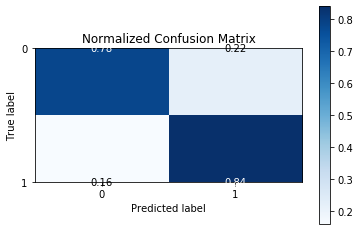

In [43]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_RF(100, 50, impresion = True)

In [44]:
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

Eficiencia 0.8052  Int_Eficiencia 0.003532704346531152  Sensibilidad 0.8054462438561829  Int_Sensibilidad 0.02761150569193721  Precision 0.8060590056669952  Int_Precision 0.021409645876811458  F-Score 0.8050508665590252  Int_F-Score 0.006476220376060252  Error_Prueba 0.1948  Int_Error 0.003532704346531136  Tiempo ejecución 76.22953510284424


In [45]:
pd.options.mode.chained_assignment = None

randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,5,5,5,5,5,
                                     10,10,10,10,10,10,
                                     20,20,20,20,20,20,
                                     50,50,50,50,50,50,
                                     100,100,100,100,100,100]), 
    'Variables analizadas por nodo' : pd.Series([50,100,250,500,750,1000,
                                                 50,100,250,500,750,1000,
                                                 50,100,250,500,750,1000,
                                                 50,100,250,500,750,1000,
                                                 50,100,250,500,750,1000,])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""
df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)

for n, k in df_types.index:
    Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_RF(n, k, impresion = False)
    df_types["Eficiencia"][n,k] = Acc
    df_types["Int_Eficiencia"][n,k] = IntAcc
    df_types["Sensibilidad"][n,k] = Sen
    df_types["Int_Sensibilidad"][n,k] = IntSen
    df_types["Precision"][n,k] = Pre
    df_types["Int_Precision"][n,k] = IntPre
    df_types["F-Score"][n,k] = f
    df_types["Int_F-Score"][n,k] = IntF
    df_types["Error_Prueba"][n,k] = error
    df_types["Int_error"][n,k] = stdError
    df_types["Tiempo de ejecución"][n,k] = tiempo


#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [46]:
qgrid_widget.get_changed_df()

Eficiencia  \
Numero de arboles Variables analizadas por nodo                       
5                 50                                         0.7491   
                  100                            0.7575000000000001   
                  250                                        0.7641   
                  500                            0.7604000000000001   
                  750                                        0.7571   
                  1000                                       0.7572   
10                50                                         0.7651   
                  100                                        0.7838   
                  250                                        0.7762   
                  500                            0.7773000000000001   
                  750                                        0.7783   
                  1000                           0.7775000000000001   
20                50                                         0.7901   
                  100                                        0.7915   
                  250                                        0.7887   
                  500                                         0.787   
                  750                            0.7878000000000001   
                  1000                                       0.7847   
50                50                                         0.8025   
                  100                                        0.7999   
                  250                                        0.7903   
                  500                            0.7895000000000001   
                  750                                        0.7957   
                  1000                           0.7918000000000001   
100               50                             0.8077000000000001   
                  100                                        0.8019   
                  250                                        0.7984   
                  500                            0.7911999999999999   
                  750                                        0.7953   
                  1000                           0.7955000000000001   

                                                        Int_Eficiencia  \
Numero de arboles Variables analizadas por nodo                          
5                 50                             0.0054433445601027395   
                  100                              0.00499099188538712   
                  250                             0.004752893855326437   
                  500                             0.012029962593458052   
                  750                             0.008760707733967634   
                  1000                            0.006318227599572537   
10                50                              0.005588380803059143   
                  100                             0.005976621118993573   
                  250                             0.008581375181169994   
                  500                             0.007061869440877514   
                  750                             0.005602677931132593   
                  1000                           0.0056595052787324004   
20                50                             0.0035707142142714023   
                  100                             0.005588380803059127   
                  250                             0.007799358948016181   
                  500                             0.008027452896155767   
                  750                             0.008354639429682158   
                  1000                            0.007190966555338721   
50                50                              0.008778952101475434   
                  100                             0.004844584605515725   
                  250                            0.0036152454965050485   
                  500                             0.007936623967405783   
        